<a href="https://colab.research.google.com/github/YueHsinLee/Option-Implied-Volatility-Spread-and-Skew/blob/main/Volatility_Spread.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gdown
import warnings
warnings.filterwarnings("ignore")

# Volatility Spread:

Option Data from OptionMetrics, Stock Price Data from CRSP.

Date: 2021/01/01~2021/12/31

### Option Filters:

    time to maturity: 30~90
    OI > 0
    best bid > 0
    IV: Non Missing
    BA Spread < 0.5*mean(Bid, Ask)
    abs(ln(moneyness)) < 0.1

## Download Data from Google Cloudm

In [ ]:
option_url = 'https://drive.google.com/file/d/1UbkTgY62EbWAhE9d86J-pRTCdZM-is7D/view?usp=share_link'
option_output = 'option data for vol spread.csv'
gdown.download(url = option_url, output = option_output, quiet=False, fuzzy=True)

stock_url = 'https://drive.google.com/file/d/1G7yrXHiMdRr_wyY1vkGFXVQ-JDv5ly_v/view?usp=share_link'
stock_output = 'stock data.csv'
gdown.download(url = stock_url, output = stock_output, quiet=False, fuzzy=True)

rvol_url = 'https://drive.google.com/file/d/1K77tA_Bx8K_ve8iIJ3WZh8EWCyx2S8Re/view?usp=share_link'
rvol_output = 'stock data for RVol.csv'
gdown.download(url = rvol_url, output = rvol_output, quiet=False, fuzzy=True)

Downloading...
From: https://drive.google.com/uc?id=1UbkTgY62EbWAhE9d86J-pRTCdZM-is7D
To: /Users/leeyuihsin/論文/選擇權資訊整理/option data for vol spread.csv
100%|██████████| 142M/142M [00:28<00:00, 4.92MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1G7yrXHiMdRr_wyY1vkGFXVQ-JDv5ly_v
To: /Users/leeyuihsin/論文/選擇權資訊整理/stock data.csv
100%|██████████| 586k/586k [00:00<00:00, 3.50MB/s]
Downloading...
From: https://drive.google.com/uc?id=1K77tA_Bx8K_ve8iIJ3WZh8EWCyx2S8Re
To: /Users/leeyuihsin/論文/選擇權資訊整理/stock data for RVol.csv
100%|██████████| 757k/757k [00:00<00:00, 3.62MB/s]


'stock data for RVol.csv'

In [ ]:
option = pd.read_csv('option data for vol spread.csv')
option['strike'] = option['strike_price']/1000

#BA Spread < 0.5*mean(Bid, Ask)
option['BA_Spread'] = (option['best_offer'] - option['best_bid'])/(0.5*(option['best_offer'] + option['best_bid']))
option = option[option['BA_Spread'] <= 1]

option = option[['date', 'ticker', 'cp_flag', 'strike', 'impl_volatility']]
option

,date,ticker,cp_flag,strike,impl_volatility
0,2015-01-02,XLB,C,49.5,0.169297
1,2015-01-02,XLB,P,47.0,0.204398
2,2015-01-02,XLB,C,47.0,0.207336
3,2015-01-02,XLB,C,48.0,0.192215
4,2015-01-02,XLB,C,49.0,0.179536
...,...,...,...,...,...
1568514,2021-12-31,XLC,P,80.0,0.145249
1568515,2021-12-31,XLC,P,81.0,0.139425
1568516,2021-12-31,XLC,P,82.0,0.135864
1568517,2021-12-31,XLC,P,83.0,0.116889


In [ ]:
stock = pd.read_csv('stock data.csv')
stock.rename(columns = {'Ticker':'ticker', 'DlyCalDt':'date', 'DlyPrc':'price'}, inplace = True)
stock = stock[['date', 'ticker', 'price']]
stock

,date,ticker,price
0,2015-01-02,XLB,48.65
1,2015-01-05,XLB,47.41
2,2015-01-06,XLB,46.99
3,2015-01-07,XLB,47.52
4,2015-01-08,XLB,48.65
...,...,...,...
16561,2021-12-27,XLY,205.17
16562,2021-12-28,XLY,205.26
16563,2021-12-29,XLY,205.67
16564,2021-12-30,XLY,204.93


### Merge datas and calculate abs(ln(moneyness))

In [ ]:
data = pd.merge(option, stock, on = ['date', 'ticker'])

#abs(ln(moneyness)) < 0.1
data['filter'] = abs(np.log(data['strike']/data['price']))
data = data[data['filter'] < 0.1]

data

,date,ticker,cp_flag,strike,impl_volatility,price,filter
0,2015-01-02,XLB,C,49.5,0.169297,48.65,0.017321
1,2015-01-02,XLB,P,47.0,0.204398,48.65,0.034504
2,2015-01-02,XLB,C,47.0,0.207336,48.65,0.034504
3,2015-01-02,XLB,C,48.0,0.192215,48.65,0.013451
4,2015-01-02,XLB,C,49.0,0.179536,48.65,0.007168
...,...,...,...,...,...,...,...
1507756,2021-12-31,XLC,P,80.0,0.145249,77.68,0.029429
1507757,2021-12-31,XLC,P,81.0,0.139425,77.68,0.041851
1507758,2021-12-31,XLC,P,82.0,0.135864,77.68,0.054121
1507759,2021-12-31,XLC,P,83.0,0.116889,77.68,0.066243


### IVol: 不分C/P 計算平均IV

In [ ]:
IVol = data.groupby(['date', 'ticker']).agg({'impl_volatility':'mean'}).reset_index()
IVol.rename(columns = {'impl_volatility':'IVol'}, inplace = True)
IVol

,date,ticker,IVol
0,2015-01-02,XLB,0.178447
1,2015-01-02,XLE,0.272993
2,2015-01-02,XLF,0.164601
3,2015-01-02,XLI,0.176324
4,2015-01-02,XLK,0.166696
...,...,...,...
16298,2021-12-31,XLK,0.213214
16299,2021-12-31,XLP,0.134323
16300,2021-12-31,XLRE,0.176939
16301,2021-12-31,XLU,0.154877


### CVol/PVol: 只看Call/Put

In [ ]:
call = data[data['cp_flag'] == 'C']
CVol = call.groupby(['date', 'ticker']).agg({'impl_volatility':'mean'}).reset_index()
CVol.rename(columns = {'impl_volatility':'CVol'}, inplace = True)
CVol

,date,ticker,CVol
0,2015-01-02,XLB,0.180735
1,2015-01-02,XLE,0.262540
2,2015-01-02,XLF,0.165623
3,2015-01-02,XLI,0.170845
4,2015-01-02,XLK,0.163657
...,...,...,...
16273,2021-12-31,XLK,0.208724
16274,2021-12-31,XLP,0.132603
16275,2021-12-31,XLRE,0.180909
16276,2021-12-31,XLU,0.151446


In [ ]:
put = data[data['cp_flag'] == 'P']
PVol = put.groupby(['date', 'ticker']).agg({'impl_volatility':'mean'}).reset_index()
PVol.rename(columns = {'impl_volatility':'PVol'}, inplace = True)
PVol

,date,ticker,PVol
0,2015-01-02,XLB,0.176302
1,2015-01-02,XLE,0.283019
2,2015-01-02,XLF,0.163642
3,2015-01-02,XLI,0.182716
4,2015-01-02,XLK,0.169533
...,...,...,...
16245,2021-12-31,XLK,0.218266
16246,2021-12-31,XLP,0.136259
16247,2021-12-31,XLRE,0.172968
16248,2021-12-31,XLU,0.159244


# 計算RVol需要更早的報酬率資料

In [ ]:
stock_for_RVol = pd.read_csv('stock data for RVol.csv')
stock_for_RVol.rename(columns = {'Ticker':'ticker', 'DlyCalDt':'date', 'DlyRet':'ret'}, inplace = True)
stock_for_RVol.sort_values(['date', 'ticker'], inplace = True)

# 計算RVol: 使用過往20交易日（一個月）的daily return計算
window_size = 20
stock_for_RVol['RVol'] = stock_for_RVol.groupby('ticker')['ret'].rolling(window=window_size).std().reset_index(0, drop=True)

# 波動率年化
stock_for_RVol['RVol'] = stock_for_RVol['RVol'] * np.sqrt(252)
stock_for_RVol.dropna(inplace = True)
RVol = stock_for_RVol[['date', 'ticker', 'RVol']]
RVol

,date,ticker,RVol
19,2014-12-01,XLB,0.134356
2715,2014-12-01,XLE,0.290501
4519,2014-12-01,XLF,0.056697
6323,2014-12-01,XLI,0.088892
8127,2014-12-01,XLK,0.073392
...,...,...,...
9911,2021-12-31,XLK,0.273293
11715,2021-12-31,XLP,0.126675
13285,2021-12-31,XLRE,0.146493
15089,2021-12-31,XLU,0.115241


# Merge RVol, IVol, CVol, PVol

In [ ]:
df1 = RVol.copy()
df2 = IVol.copy()
df3 = CVol.copy()
df4 = PVol.copy()

# 將四個資料框按照 ['date', 'ticker'] 合併
df = pd.merge(df1, df2, on=['date', 'ticker'], how='outer')
df = pd.merge(df, df3, on=['date', 'ticker'], how='outer')
df = pd.merge(df, df4, on=['date', 'ticker'], how='outer')

del df1 ,df2 ,df3 ,df4
df.dropna(inplace = True)
df['RV-IV'] = df['RVol'] - df['IVol']
df['CV-PV'] = df['CVol'] - df['PVol']
df = df.copy().merge(stock_for_RVol[['date', 'ticker', 'ret']], on = ['date', 'ticker'], how = 'inner')
df['date'] = pd.to_datetime(df['date'], format='%Y-%m-%d')
df

,date,ticker,RVol,IVol,CVol,PVol,RV-IV,CV-PV,ret
0,2015-01-02,XLB,0.204519,0.178447,0.180735,0.176302,0.026072,0.004432,0.001441
1,2015-01-02,XLE,0.303946,0.272993,0.262540,0.283019,0.030953,-0.020479,0.004674
2,2015-01-02,XLF,0.167116,0.164601,0.165623,0.163642,0.002515,0.001981,0.000000
3,2015-01-02,XLI,0.157267,0.176324,0.170845,0.182716,-0.019056,-0.011871,-0.001237
4,2015-01-02,XLK,0.175543,0.166696,0.163657,0.169533,0.008846,-0.005876,-0.001935
...,...,...,...,...,...,...,...,...,...
16205,2021-12-31,XLK,0.273293,0.213214,0.208724,0.218266,0.060078,-0.009542,-0.004865
16206,2021-12-31,XLP,0.126675,0.134323,0.132603,0.136259,-0.007649,-0.003656,0.006789
16207,2021-12-31,XLRE,0.146493,0.176939,0.180909,0.172968,-0.030445,0.007941,0.002128
16208,2021-12-31,XLU,0.115241,0.154877,0.151446,0.159244,-0.039636,-0.007798,0.003505


## RV-IV: 根據原始論文指出，RV-IV越高，報酬率會越低
### 因此，我們做多RV-IV最低的三檔資產，做空RV-IV最高的三檔資產

![b.png](attachment:08140bf7-3aa0-4d89-ac17-19f477cbbb58.png)

In [ ]:
bt = df[['date', 'ticker', 'RV-IV', 'ret']]
bt['year_month'] = bt['date'].dt.to_period('M')
bt = bt[['date', 'year_month', 'ticker', 'RV-IV', 'ret']].sort_values(['ticker', 'date'])
bt['RI_vol_spread'] =bt.groupby(['year_month', 'ticker'])['RV-IV'].transform('mean')

RI_vol_spread = bt[['year_month', 'ticker', 'RI_vol_spread']].drop_duplicates(['ticker', 'year_month'])
RI_vol_spread['prev_RI_spread'] = RI_vol_spread.groupby(['ticker'])['RI_vol_spread'].shift()
RI_vol_spread = RI_vol_spread[['year_month', 'ticker', 'prev_RI_spread']]

RI_vol_spread.dropna(inplace = True)
RI_vol_spread.sort_values(['year_month', 'prev_RI_spread'], inplace=True)

# 根据 year_month 对每个 ticker 的 prev_skew_avg 进行排名
RI_vol_spread['rank'] = RI_vol_spread.groupby('year_month')['prev_RI_spread'].rank()

# 创建新的 position 列并初始化为 0
RI_vol_spread['position'] = 0

# 遍历每个月份
for month in RI_vol_spread['year_month'].unique():
    # 获取当前月份的数据
    month_data = RI_vol_spread[RI_vol_spread['year_month'] == month]

    # 将排名为前三名(最低)的 ticker 的 position 设为 -1
    RI_vol_spread.loc[(RI_vol_spread['year_month'] == month) & (RI_vol_spread['rank'] <= 3), 'position'] = 1
    
    # 将排名为最后三名(最高)的 ticker 的 position 设为 1
    RI_vol_spread.loc[(RI_vol_spread['year_month'] == month) & (RI_vol_spread['rank'] > len(month_data) - 3), 'position'] = -1

bt = pd.merge(bt, RI_vol_spread, on = ['year_month', 'ticker'])

bt.dropna(inplace = True)
bt = bt[['date', 'ticker', 'prev_RI_spread','rank', 'position', 'ret']].sort_values(['date', 'rank']).reset_index(drop = True)
bt

,date,ticker,prev_RI_spread,rank,position,ret
0,2015-02-02,XLI,-0.017484,1.0,1,0.014843
1,2015-02-02,XLP,-0.012621,2.0,1,0.011870
2,2015-02-02,XLY,-0.011816,3.0,1,0.009001
3,2015-02-02,XLU,-0.006435,4.0,0,0.004346
4,2015-02-02,XLK,-0.003144,5.0,0,0.010276
...,...,...,...,...,...,...
16032,2021-12-31,XLRE,-0.057234,6.0,0,0.002128
16033,2021-12-31,XLY,-0.056026,7.0,0,-0.002391
16034,2021-12-31,XLC,-0.052987,8.0,-1,-0.013838
16035,2021-12-31,XLP,-0.037984,9.0,-1,0.006789


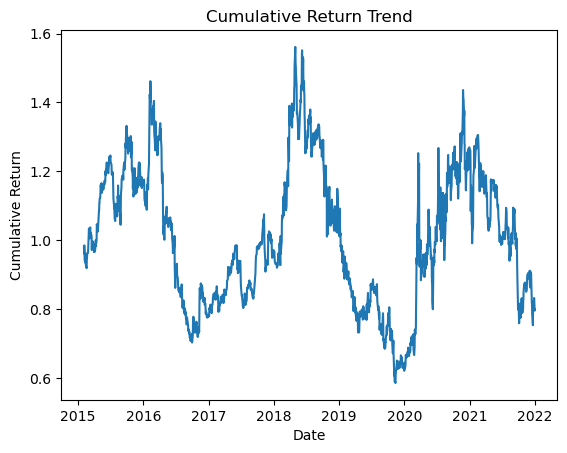

In [ ]:
grouped = bt.groupby('date')
trade = []
for date, group in grouped:
    ret = (group['position']*group['ret']).sum()
    trade.append({'date':date, 'strategy_ret':ret})
    
trade = pd.DataFrame(trade)
trade['cum_ret'] = (1+trade['strategy_ret']).cumprod()
plt.plot(trade['date'], trade['cum_ret'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Trend')
plt.show()

## CV-PV: 根據原始論文指出，CV-PV越高，報酬率會越高
### 因此，我們做多CV-PV最高的三檔資產，做空CV-PV最低的三檔資產

![a.png](attachment:abdef86e-12f3-4b56-88de-74ee0fd0d409.png)

In [ ]:
bt = df[['date', 'ticker', 'CV-PV', 'ret']]
bt['year_month'] = bt['date'].dt.to_period('M')
bt = bt[['date', 'year_month', 'ticker', 'CV-PV', 'ret']].sort_values(['ticker', 'date'])
bt['CP_vol_spread'] =bt.groupby(['year_month', 'ticker'])['CV-PV'].transform('mean')

CP_vol_spread = bt[['year_month', 'ticker', 'CP_vol_spread']].drop_duplicates(['ticker', 'year_month'])
CP_vol_spread['prev_CP_spread'] = CP_vol_spread.groupby(['ticker'])['CP_vol_spread'].shift()
CP_vol_spread = CP_vol_spread[['year_month', 'ticker', 'prev_CP_spread']]

CP_vol_spread.dropna(inplace = True)
CP_vol_spread.sort_values(['year_month', 'prev_CP_spread'], inplace=True)

# 根据 year_month 对每个 ticker 的 prev_skew_avg 进行排名
CP_vol_spread['rank'] = CP_vol_spread.groupby('year_month')['prev_CP_spread'].rank()

# 创建新的 position 列并初始化为 0
CP_vol_spread['position'] = 0

# 遍历每个月份
for month in CP_vol_spread['year_month'].unique():
    # 获取当前月份的数据
    month_data = CP_vol_spread[CP_vol_spread['year_month'] == month]

    # 将排名为前三名(最低)的 ticker 的 position 设为 -1
    CP_vol_spread.loc[(CP_vol_spread['year_month'] == month) & (CP_vol_spread['rank'] <= 3), 'position'] = -1
    
    # 将排名为最后三名(最高)的 ticker 的 position 设为 1
    CP_vol_spread.loc[(CP_vol_spread['year_month'] == month) & (CP_vol_spread['rank'] > len(month_data) - 3), 'position'] = 1

bt = pd.merge(bt, CP_vol_spread, on = ['year_month', 'ticker'])

bt.dropna(inplace = True)
bt = bt[['date', 'ticker', 'prev_CP_spread','rank', 'position', 'ret']].sort_values(['date', 'rank']).reset_index(drop = True)
bt

,date,ticker,prev_CP_spread,rank,position,ret
0,2015-02-02,XLU,-0.013041,1.0,-1,0.004346
1,2015-02-02,XLE,-0.012021,2.0,-1,0.030576
2,2015-02-02,XLI,-0.010847,3.0,-1,0.014843
3,2015-02-02,XLP,-0.007715,4.0,0,0.011870
4,2015-02-02,XLY,-0.006017,5.0,0,0.009001
...,...,...,...,...,...,...
16032,2021-12-31,XLB,-0.003575,6.0,0,0.004434
16033,2021-12-31,XLC,-0.002907,7.0,0,-0.013838
16034,2021-12-31,XLF,-0.002415,8.0,1,-0.001789
16035,2021-12-31,XLE,-0.000290,9.0,1,0.002529


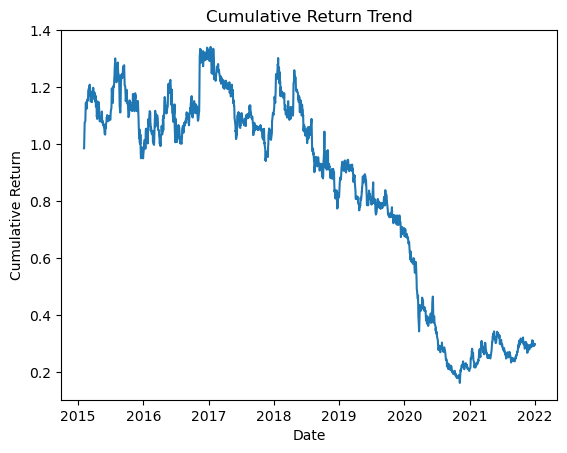

In [ ]:
grouped = bt.groupby('date')
trade = []
for date, group in grouped:
    ret = (group['position']*group['ret']).sum()
    trade.append({'date':date, 'strategy_ret':ret})
    
trade = pd.DataFrame(trade)
trade['cum_ret'] = (1+trade['strategy_ret']).cumprod()
plt.plot(trade['date'], trade['cum_ret'])
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.title('Cumulative Return Trend')
plt.show()

## BOX Plot

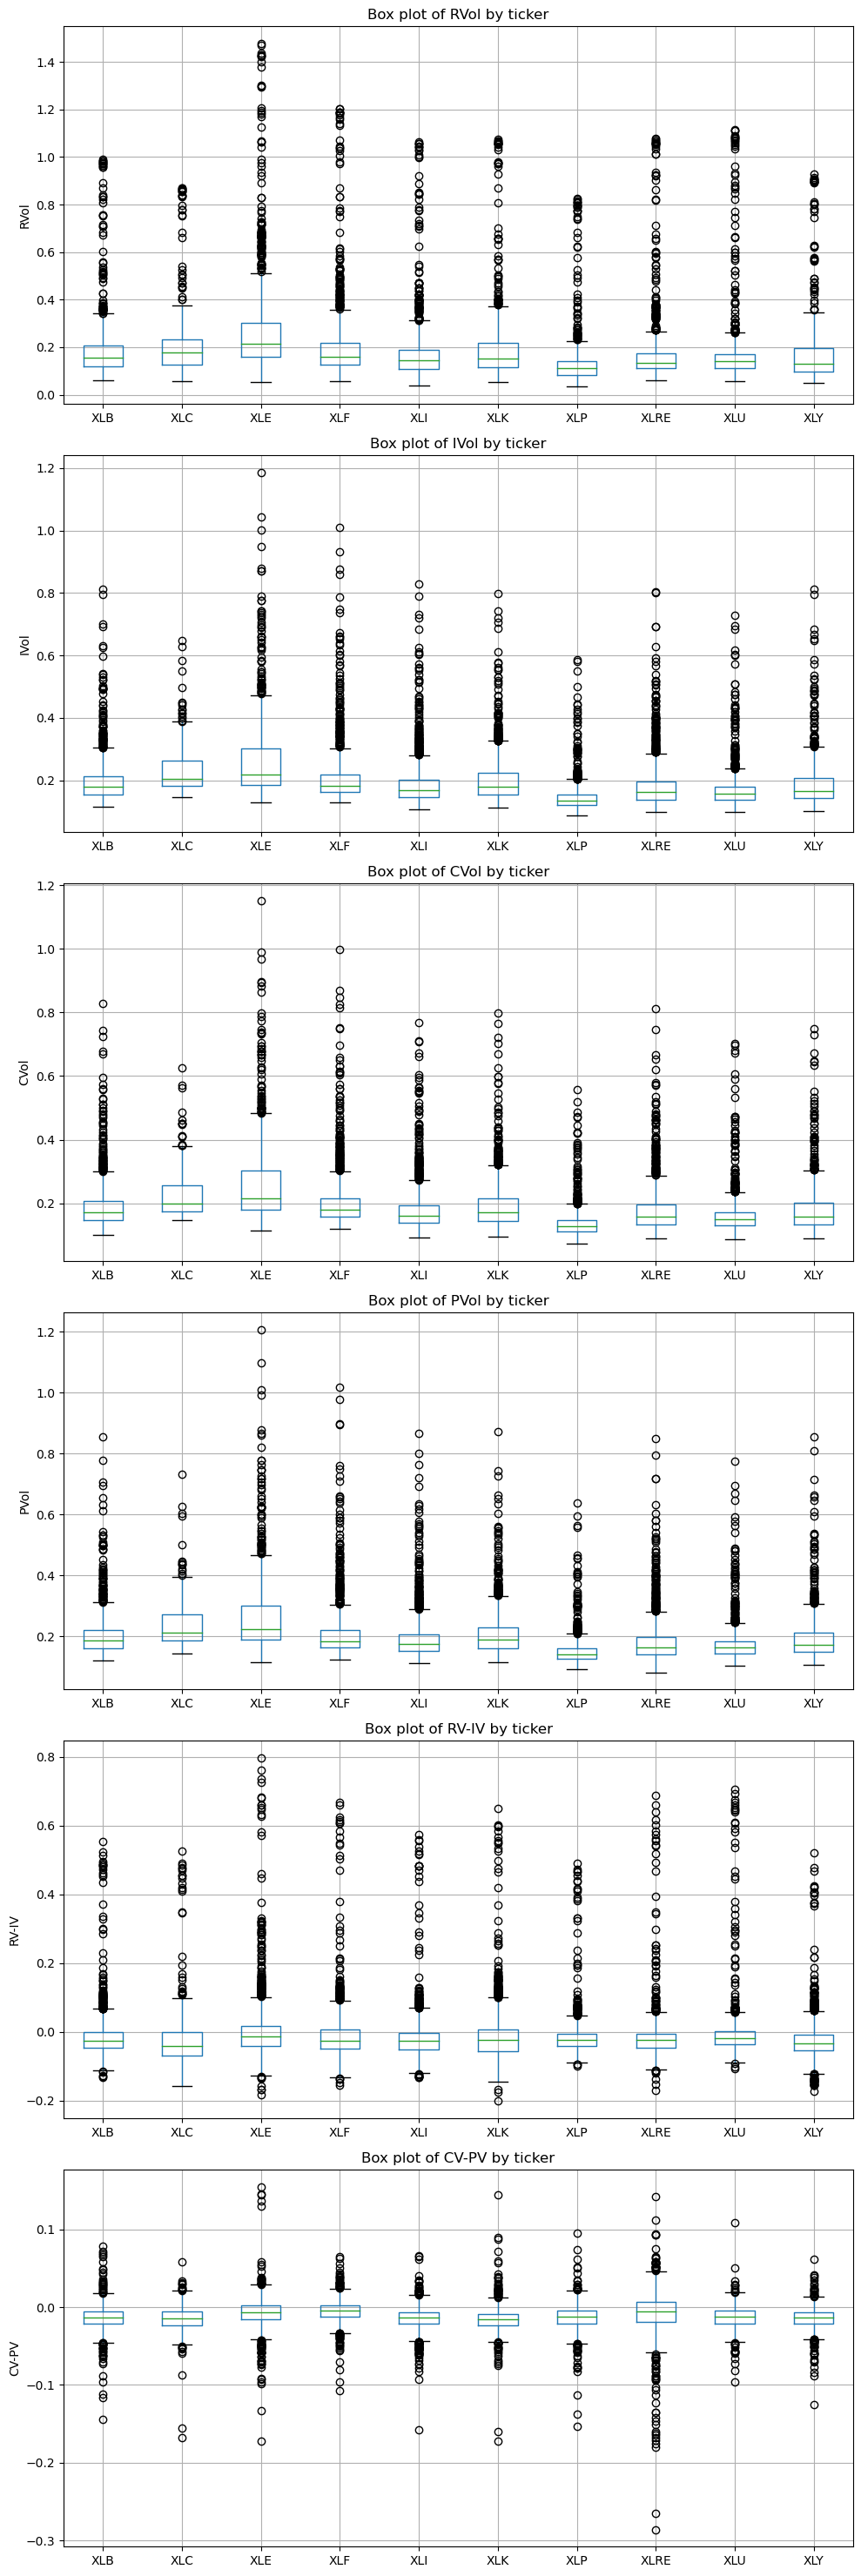

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=6, ncols=1, figsize=(10, 30))

df.boxplot(column='RVol', by='ticker', ax=axes[0])
df.boxplot(column='IVol', by='ticker', ax=axes[1])
df.boxplot(column='CVol', by='ticker', ax=axes[2])
df.boxplot(column='PVol', by='ticker', ax=axes[3])
df.boxplot(column='RV-IV', by='ticker', ax=axes[4])
df.boxplot(column='CV-PV', by='ticker', ax=axes[5])


axes[0].set_title('Box plot of RVol by ticker')
axes[0].set_xlabel('')
axes[0].set_ylabel('RVol')

axes[1].set_title('Box plot of IVol by ticker')
axes[1].set_xlabel('')
axes[1].set_ylabel('IVol')

axes[2].set_title('Box plot of CVol by ticker')
axes[2].set_xlabel('')
axes[2].set_ylabel('CVol')

axes[3].set_title('Box plot of PVol by ticker')
axes[3].set_xlabel('')
axes[3].set_ylabel('PVol')

axes[4].set_title('Box plot of RV-IV by ticker')
axes[4].set_xlabel('')
axes[4].set_ylabel('RV-IV')

axes[5].set_title('Box plot of CV-PV by ticker')
axes[5].set_xlabel('')
axes[5].set_ylabel('CV-PV')

plt.tight_layout()


plt.suptitle('')
plt.show()